<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module1-Architect/LS_DS_421_Architect_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
from google.colab import files
uploaded = files.upload()

Saving quickdraw10.npz to quickdraw10.npz


In [2]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [7]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

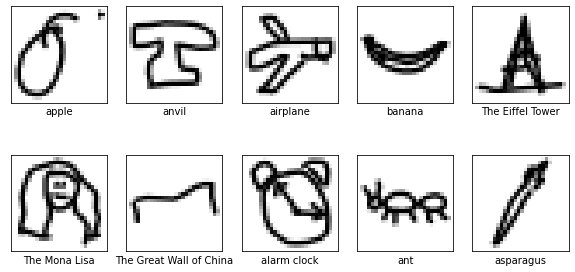

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [9]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [10]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [11]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  19,  51,  51,  51,  51,  51,  29,   6,   0,   0,   

In [12]:
# Standardize
X = X.astype("float32") / 255

In [13]:
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [21]:
model = Sequential()

In [22]:
# Add hidden layers
model.add(
    # Hidden Layer 1. Forgot why we used 32 neurons so using the same for now to be safe
    Dense(32, activation = "relu", input_dim = 784)
)

model.add(
    # Hidden Layer 2
    Dense(32, activation = "relu")
)

model.add(
    # Output layer
    Dense(10, activation = "softmax")
)


In [23]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [25]:
# Fit
baseline = model.fit(X_train, y_train, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
2344/2344 [==============================] - 6s 3ms/step - loss: 0.4164 - accuracy: 0.8763 - val_loss: 0.5248 - val_accuracy: 0.8470
Epoch 2/30
2344/2344 [==============================] - 6s 3ms/step - loss: 0.4087 - accuracy: 0.8774 - val_loss: 0.5206 - val_accuracy: 0.8480
Epoch 3/30
2344/2344 [==============================] - 6s 3ms/step - loss: 0.4008 - accuracy: 0.8799 - val_loss: 0.5163 - val_accuracy: 0.8496
Epoch 4/30
2344/2344 [==============================] - 6s 2ms/step - loss: 0.3927 - accuracy: 0.8816 - val_loss: 0.5210 - val_accuracy: 0.8471
Epoch 5/30
2344/2344 [==============================] - 6s 2ms/step - loss: 0.3873 - accuracy: 0.8844 - val_loss: 0.5457 - val_accuracy: 0.8416
Epoch 6/30
2344/2344 [==============================] - 6s 3ms/step - loss: 0.3811 - accuracy: 0.8866 - val_loss: 0.5265 - val_accuracy: 0.8464
Epoch 7/30
2344/2344 [==============================] - 6s 3ms/step - loss: 0.3764 - accuracy: 0.8872 - val_loss: 0.5460 - val_accuracy:

In [26]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.6050 - accuracy: 0.8423


[0.6049975752830505, 0.8422799706459045]

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [27]:
baseline.history

{'accuracy': [0.8762533068656921,
  0.8773733377456665,
  0.8799066543579102,
  0.8815733194351196,
  0.8844266533851624,
  0.8865866661071777,
  0.8871733546257019,
  0.8871999979019165,
  0.8894533514976501,
  0.8912533521652222,
  0.8909733295440674,
  0.8931199908256531,
  0.8939333558082581,
  0.8948133587837219,
  0.8966799974441528,
  0.8973733186721802,
  0.8978133201599121,
  0.8979066610336304,
  0.898413360118866,
  0.8993866443634033,
  0.9011333584785461,
  0.9016933441162109,
  0.9017866849899292,
  0.9033200144767761,
  0.902999997138977,
  0.902999997138977,
  0.904906690120697,
  0.9035199880599976,
  0.9043200016021729,
  0.9067333340644836],
 'loss': [0.4164360463619232,
  0.4086761772632599,
  0.40080657601356506,
  0.39273157715797424,
  0.38732409477233887,
  0.38111773133277893,
  0.3763650953769684,
  0.37205636501312256,
  0.3664318025112152,
  0.3642215132713318,
  0.36018702387809753,
  0.3548848330974579,
  0.3525526523590088,
  0.34761783480644226,
  0.3455

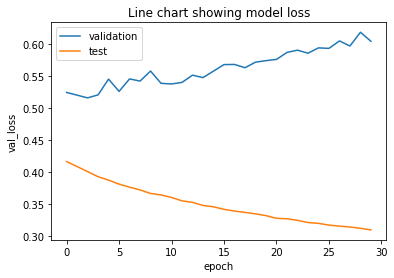

In [30]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df, label = "validation")
ax = sns.lineplot(x='epoch', y='loss', data=df, label = "test")
plt.title("Line chart showing model loss");

Validation loss increasing. Overfitting?

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


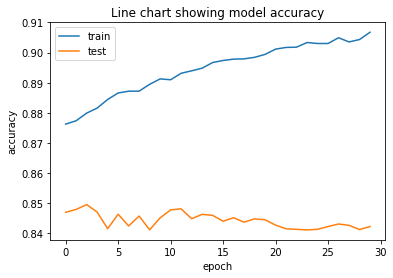

In [33]:
# Look at accuracy
ax = sns.lineplot("epoch", "accuracy", data = df, label = "train")
ax = sns.lineplot("epoch", "val_accuracy", data = df, label = "test")
plt.title("Line chart showing model accuracy");

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [ ]:
from tf.keras.optimizers import Adam

adam = Adam()

In [34]:
# Started with adam so I'll try sgd
# Copy baseline code to have everything else the same
model = Sequential()

# Add hidden layers
model.add(
    # Hidden Layer 1. Forgot why we used 32 neurons so using the same for now to be safe
    Dense(32, activation = "relu", input_dim = 784)
)

model.add(
    # Hidden Layer 2
    Dense(32, activation = "relu")
)

model.add(
    # Output layer
    Dense(10, activation = "softmax")
)

model.compile(optimizer = "sgd", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

# Fit
results = model.fit(X_train, y_train, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
2344/2344 [==============================] - 6s 3ms/step - loss: 1.1333 - accuracy: 0.6554 - val_loss: 0.8523 - val_accuracy: 0.7525
Epoch 2/30
2344/2344 [==============================] - 6s 3ms/step - loss: 0.8029 - accuracy: 0.7652 - val_loss: 0.7658 - val_accuracy: 0.7775
Epoch 3/30
2344/2344 [==============================] - 6s 3ms/step - loss: 0.7277 - accuracy: 0.7872 - val_loss: 0.7084 - val_accuracy: 0.7900
Epoch 4/30
2344/2344 [==============================] - 6s 3ms/step - loss: 0.6765 - accuracy: 0.8023 - val_loss: 0.6731 - val_accuracy: 0.7976
Epoch 5/30
2344/2344 [==============================] - 6s 3ms/step - loss: 0.6402 - accuracy: 0.8116 - val_loss: 0.6487 - val_accuracy: 0.8048
Epoch 6/30
2344/2344 [==============================] - 6s 3ms/step - loss: 0.6130 - accuracy: 0.8186 - val_loss: 0.6223 - val_accuracy: 0.8146
Epoch 7/30
2344/2344 [==============================] - 6s 3ms/step - loss: 0.5916 - accuracy: 0.8253 - val_loss: 0.6088 - val_accuracy:

In [39]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.8434


[0.5321444272994995, 0.8434399962425232]

Lower loss but about the same accuracy. Interesting. Didn't know that was possible

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

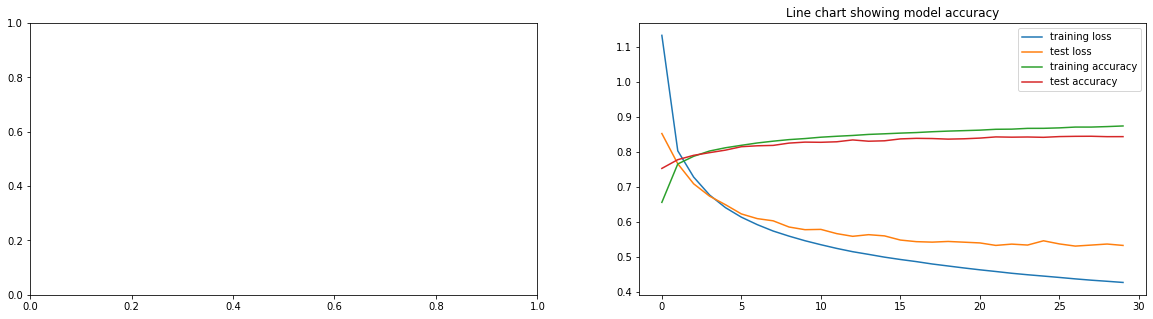

In [45]:
epochs = [i for i in range(len(results.history["loss"]))]

fig, ax = plt.subplots(1, 2, figsize = (20, 5))

ax[0] = sns.lineplot(epochs, results.history["loss"], label = "training loss")
ax[0] = sns.lineplot(epochs, results.history["val_loss"], label = "test loss")
ax[0].title.set_text("Line chart showing model loss")

ax[1] = sns.lineplot(epochs, results.history["accuracy"], label = "training accuracy")
ax[1] = sns.lineplot(epochs, results.history["val_accuracy"], label = "test accuracy")
ax[1].title.set_text("Line chart showing model accuracy")

plt.show()

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)